In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import numpy as np


C:\Users\Al-ghazali\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ['airplane', 'automobile','bird','cat', 'deer','dog', 'frog', 'horse','ship','truck']

In [10]:
def plot_image(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

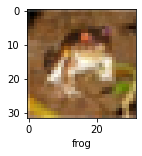

In [11]:
plot_image(X_train, y_train,0)

In [9]:
X_train = X_train /255
X_test = X_test /255

In [10]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.8091 - accuracy: 0.3570
Epoch 2/5
1180/1563 [=====================>........] - ETA: 30s - loss: 1.6374 - accuracy: 0.4224

KeyboardInterrupt: 

In [17]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 6s 16ms/step - loss: 2.3639 - accuracy: 0.0900


[2.3639073371887207, 0.09000000357627869]

In [32]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=32, activation= 'relu', kernel_size=(3,3), input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, activation= 'relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, activation= 'relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(70, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [21]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
cnn.fit(X_train, y_train, epochs=15)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [31]:
cnn.evaluate(X_test, y_test)

TypeError: in user code:

    File "C:\Users\Al-ghazali\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Al-ghazali\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Al-ghazali\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Al-ghazali\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1896, in test_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\Al-ghazali\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1225, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\Al-ghazali\anaconda3\lib\site-packages\keras\src\engine\compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\Al-ghazali\anaconda3\lib\site-packages\keras\src\utils\metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "C:\Users\Al-ghazali\anaconda3\lib\site-packages\keras\src\metrics\base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "C:\Users\Al-ghazali\anaconda3\lib\site-packages\keras\src\metrics\base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Al-ghazali\anaconda3\lib\site-packages\keras\src\metrics\accuracy_metrics.py", line 462, in sparse_categorical_accuracy
        if matches.shape.ndims > 1 and matches.shape[-1] == 1:

    TypeError: '>' not supported between instances of 'NoneType' and 'int'


In [25]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

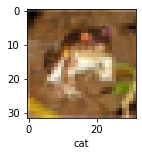

In [27]:
plot_image(X_test, y_test, 0)

In [37]:
pip install jupyterthemes


Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install --upgrade jupyterthemes

In [47]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[3.5558071e-04, 8.1303202e-05, 9.2863169e-04, 8.9917666e-01,
        3.5315793e-04, 7.7960610e-02, 1.8826948e-02, 2.8932141e-04,
        1.9903097e-03, 3.7541853e-05],
       [4.2124009e-03, 5.1841322e-02, 5.5173377e-06, 6.2678187e-06,
        6.2926320e-06, 2.8871582e-07, 2.9611130e-05, 4.1570243e-07,
        9.4359028e-01, 3.0769379e-04],
       [9.1080919e-02, 3.8172200e-02, 1.7196273e-03, 4.5543718e-03,
        2.5948134e-04, 6.5707439e-04, 1.1699812e-03, 1.3108579e-04,
        8.1972593e-01, 4.2529296e-02],
       [9.2430627e-01, 2.2015288e-02, 4.6872976e-03, 3.4845015e-04,
        1.6493505e-03, 6.3903120e-05, 4.8702801e-04, 6.8455888e-06,
        4.0764339e-02, 5.6712301e-03],
       [2.7190752e-06, 4.5679059e-05, 4.8980806e-02, 5.6305928e-03,
        8.9443451e-01, 3.5272317e-03, 4.7359936e-02, 1.0770347e-05,
        6.1163673e-06, 1.5861373e-06]], dtype=float32)

In [48]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [50]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

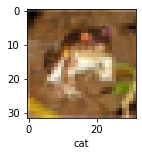

In [54]:
plot_image(X_test, y_test,0)

In [55]:
classes[y_classes[0]]

'cat'

In [36]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]